In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import datetime as dt
import cmath
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

%pylab inline
#pylab.rcParams['figure.figsize'] = (2, 1)

Populating the interactive namespace from numpy and matplotlib


In [2]:
countByDay = pd.read_csv(r'data\semantic\countByDay.csv', index_col = 'day', header=0, parse_dates=[0]).sort_values(by = 'day')
posByDay   = pd.read_csv(r'data\semantic\posByDay.csv',   index_col = 'day', header=0, parse_dates=[0]).sort_values(by = 'day')
neutrByDay = pd.read_csv(r'data\semantic\neutrByDay.csv', index_col = 'day', header=0, parse_dates=[0]).sort_values(by = 'day')
negByDay   = pd.read_csv(r'data\semantic\negByDay.csv',   index_col = 'day', header=0, parse_dates=[0]).sort_values(by = 'day')

In [3]:
ftse = pd.read_csv(r'data\semantic\FTSE.csv', index_col = 'Date', header=0, parse_dates=[0]).sort_values(by = 'Date')
ftse = ftse[['Adj Close', 'Volume']]
ftse.columns = ['price', 'volume']

In [4]:
# Перевод цены и объема в безразмерные (dimensionless) величины 
ftse['priceDl']  = ftse['price'].apply(lambda x: x / ftse['price'].iloc[0])
ftse['volumeDl'] = ftse['volume'].apply(lambda x: x / ftse['volume'].iloc[0])
ftse.head()

,price,volume,priceDl,volumeDl
Date,,,,
2015-02-11,6818.200195,623275800,1.000000,1.000000
2015-02-12,6828.100098,809863300,1.001452,1.299366
2015-02-13,6873.500000,734854200,1.008111,1.179019
2015-02-16,6857.100098,415979100,1.005705,0.667408
2015-02-17,6898.100098,612932700,1.011719,0.983405


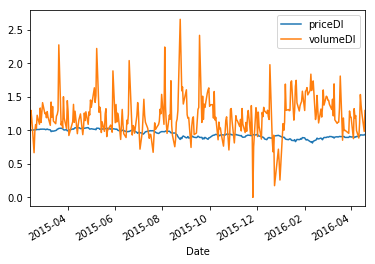

In [5]:
ftse[['priceDl', 'volumeDl']].plot();

In [6]:
results = pd.merge(posByDay, neutrByDay, on='day')
results = pd.merge(results, negByDay, on='day')
results.index.names = ["date"]

results.columns = ['positive', 'neutral', 'negative']
results["sentimentCoef"] = ((results["positive"] - results["negative"])/
                            (results["positive"] + results["neutral"] + results["negative"]))
results.head()

,positive,neutral,negative,sentimentCoef
date,,,,
2016-02-24,738,4624,2511,-0.225200
2016-02-25,1138,6670,3583,-0.214643
2016-02-26,952,5775,3287,-0.233174
2016-02-27,804,4578,2360,-0.200982
2016-02-28,1057,5172,2616,-0.176258


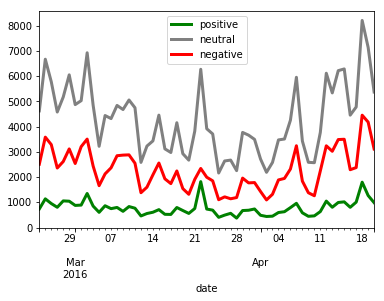

In [7]:
results[['positive', 'neutral', 'negative']].plot(linewidth = 3, 
                                                    color=['g', 'gray', 'r']);

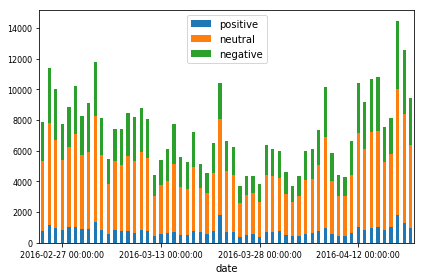

In [8]:
results[['positive','neutral','negative']].plot.bar(stacked=True);

plt.tick_params(axis='both', which='both', labelsize=8)

plt.xticks(plt.xticks()[0][3::15], 
           plt.xticks()[1][3::15])
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig('plots\sentiments-analysis\sentiments-analysis\stacked-bar.png')
plt.show()

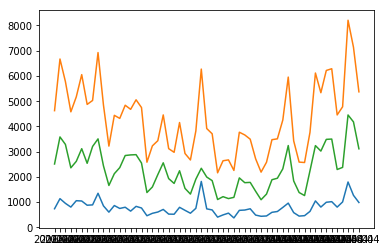

In [9]:
fig, ax = plt.subplots()

ax.plot(results.index, results[['positive','neutral','negative']].values)
ax.set_xticks(results.index)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m"))

In [10]:
# allRes = pd.merge(ftse, results[['positive','neutral','negative', 'sentimentCoef']], on = 'date')
allRes = pd.merge(ftse, results, left_index=True, right_index=True)
allRes.head()

,price,volume,priceDl,volumeDl,positive,neutral,negative,sentimentCoef
2016-02-24,5867.200195,834682500,0.860520,1.339186,738,4624,2511,-0.225200
2016-02-25,6012.799805,999956900,0.881875,1.604357,1138,6670,3583,-0.214643
2016-02-26,6096.000000,858937600,0.894078,1.378102,952,5775,3287,-0.233174
2016-02-29,6097.100098,941705500,0.894239,1.510897,1045,6051,3117,-0.202879
2016-03-01,6152.899902,933626200,0.902423,1.497934,878,4872,2539,-0.200386


In [11]:
# Центрирование безразмерных величин цены и объема
allRes['priceDlC'] = allRes['priceDl'] - allRes['priceDl'].mean()
allRes['volumeDlC'] = allRes['volumeDl'] - allRes['volumeDl'].mean()
allRes['sentimentCoefC'] = allRes['sentimentCoef'] - allRes['sentimentCoef'].mean()

allRes['complex'] = allRes['volumeDlC'] + allRes['sentimentCoefC'] * 1j
allRes.head(5)

,price,volume,priceDl,volumeDl,positive,neutral,negative,sentimentCoef,priceDlC,volumeDlC,sentimentCoefC,complex
2016-02-24,5867.200195,834682500,0.860520,1.339186,738,4624,2511,-0.225200,-0.044794,0.084173,-0.012789,(0.08417323354072792-0.012788972968866635j)
2016-02-25,6012.799805,999956900,0.881875,1.604357,1138,6670,3583,-0.214643,-0.023440,0.349344,-0.002232,(0.34934380489934647-0.0022320614828287844j)
2016-02-26,6096.000000,858937600,0.894078,1.378102,952,5775,3287,-0.233174,-0.011237,0.123089,-0.020762,(0.1230887505558278-0.020762479182484334j)
2016-02-29,6097.100098,941705500,0.894239,1.510897,1045,6051,3117,-0.202879,-0.011076,0.255884,0.009532,(0.2558837347345815+0.009532393807529793j)
2016-03-01,6152.899902,933626200,0.902423,1.497934,878,4872,2539,-0.200386,-0.002892,0.242921,0.012025,(0.2429210944395468+0.01202502403143818j)


## Нахождение коэффициента парной корреляции 

In [12]:
def rc(y,x):
    yr = y.real
    yi = y.imag
    xr = x.real
    xi = x.imag
    
    rc_xy = (
        ((yr + 1j*yi)*(xr + 1j*xi)).sum()
        / 
        sqrt(((yr + 1j*yi)**2).sum() * ((xr + 1j*xi)**2).sum())
        )
    return rc_xy;

In [13]:
y = pd.DataFrame({"y":[(1+3j),(2+2j),(3+3j)],
                  "x":[(1+1j),(2+4j),(3+3j)]})
print(rc(y['y'], y['x']))
print(np.corrcoef(y['x'], y['y'])[0][1])

(-0.9701074223859091+0.10586052231081682j)
(0.15811388300841897+0.474341649025257j)


In [14]:
y = pd.DataFrame({"y":[(1+0j),(2+2j)],
                  "x":[(0+1j),(1+2j)]})
print(rc(y['y'], y['x']))
print(np.corrcoef(y['y'], y['x'])[0][1])

(-1.0765386909793453+0.05627008447027136j)
(0.9486832980505138+0.31622776601683794j)


In [15]:
# allRes = allRes.sort_values(by = 'date')
allRes.to_csv("data/output/allRes.csv")
#allRes

In [16]:
print('rc volume-volume:     ' + str(rc(allRes['complex'],
                                    allRes['complex'])))

print('rc volume-price:      ' + str(rc(allRes['complex'],
                                    allRes['priceDl'])))

print('rc price-volume*1000: ' + str(rc(allRes['complex'],
                                    allRes['priceDl']*1000)))

#rc
print(rc(allRes['sentimentCoefC'], allRes['priceDlC']))
#Стандартная функция для нахождения корреляции
print(np.corrcoef(allRes['sentimentCoefC'], allRes['priceDlC'])[0][1])

#rc
print(rc(allRes['priceDlC'],allRes['complex']))
#Стандартная функция для нахождения корреляции
print(np.corrcoef(allRes['priceDlC'],allRes['complex'])[0][1])

rc volume-volume:     (1+0j)
rc volume-price:      (-0.002721963440654711-1.501590088785749e-05j)
rc price-volume*1000: (-0.0027219634406546863-1.5015900887858539e-05j)
(0.018548078910976543+0j)
0.018548078910976533
(-0.16925067162185775-0.0009336831172452041j)
(-0.165151433030158-0.0028913531808145137j)


In [17]:
startShift = -14
endShift = 14

#correlation coef dataframe
rcdf = pd.DataFrame(columns=('shift', 'rc'))

for i in range(startShift, endShift+1):
    if (i < 0):
        row = pd.DataFrame({"shift":[i], 
                            "rc": [rc(allRes['priceDlC'].iloc[:i],
                                  allRes['complex'].shift(i).iloc[:i])],
                            "npcorr":np.corrcoef(allRes['priceDlC'].iloc[:i], 
                                                 allRes['complex'].shift(i).iloc[:i])[0][1]})
    elif (i == 0):
        row = pd.DataFrame({"shift":[i], 
                            "rc": [rc(allRes['priceDlC'],
                                  allRes['complex'])],
                            "npcorr":np.corrcoef(allRes['priceDlC'], 
                                                 allRes['complex'])[0][1]})
    else:    
        row = pd.DataFrame({"shift":[i], 
                            "rc": [rc(allRes['priceDlC'].iloc[i:],
                                  allRes['complex'].shift(i).iloc[i:])],
                            "npcorr":np.corrcoef(allRes['priceDlC'].iloc[i:], 
                                                 allRes['complex'].shift(i).iloc[i:])[0][1]})

    rcdf = rcdf.append(row, ignore_index=True, sort=False)
    
rcdf.head()

,shift,rc,npcorr
0,-14,(0.12706214562704407+0.010878113476022388j),(-0.049522143290745786-0.024486033172962298j)
1,-13,(0.13388961006743544+0.015676474562386338j),(-0.04556132022995264-0.026934397753462413j)
2,-12,(0.11663296121588679+0.02589605604794582j),(-0.07149641946302293-0.038743368764772294j)
3,-11,(-0.1720150171926959+0.01572215549122958j),(-0.3424818432765644-0.03151570408636007j)
4,-10,(0.10400613106185112+0.03444319303024696j),(-0.0354089359311147-0.04009723473682393j)


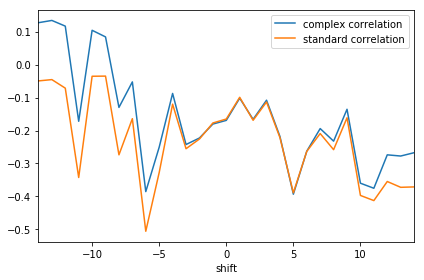

In [18]:
rcdf['complex correlation'] = rcdf['rc'].apply(lambda x: x.real)
rcdf['standard correlation'] = rcdf['npcorr'].apply(lambda x: x.real)
rcdf[['shift','complex correlation', 'standard correlation']].plot(x = 'shift')
plt.tight_layout()
plt.savefig('plots\sentiments-analysis\complex-and-standard-correlations.png')
plt.show()

In [19]:
def linregb(y, x):
    yr = y.real
    yi = y.imag
    xr = x.real
    xi = x.imag

    b = (
        ((yr + 1j*yi)*(xr + 1j*xi)).sum()
        / 
        ((xr + 1j*xi)**2).sum()
    )

    return b

In [20]:
train = allRes[['priceDlC','volumeDlC','sentimentCoefC','complex']].iloc[0:14]
test  = allRes[['priceDlC','volumeDlC','sentimentCoefC','complex']].iloc[15:18]

In [21]:
#b0 + ib1, где y = 'priceDl', x = 'complex'
b = linregb(train['priceDlC'], train['complex'])
print('b = ', b)

test['lrPriceDlC'] = test['complex'] * b
test['lrPriceDlC_real'] = test['lrPriceDlC'].apply(lambda x: x.real)
test.head(5)

b =  (-0.04439975172248905+0.0015713365018182046j)


,priceDlC,volumeDlC,sentimentCoefC,complex,lrPriceDlC,lrPriceDlC_real
2016-03-16,0.000423,-0.130693,-0.039696,(-0.13069344345844325-0.039695789653795444j),(0.005865131884563547+0.0015571198268021016j),0.005865
2016-03-17,0.004178,0.080856,-0.020738,(0.08085592200705372-0.02073767144625377j),(-0.0035573970022999115+0.0010477993251540672j),-0.003557
2016-03-18,0.002491,0.556696,0.011076,(0.5566964728514794+0.011076261374951046j),(-0.02473458971319319+0.000382974233163755j),-0.024735


In [22]:
lm = LinearRegression()
lm.fit(train[['volumeDlC', 'sentimentCoefC']], train['priceDlC'])
test['sklearnLrPriceDlC'] = lm.predict(test[['volumeDlC', 'sentimentCoefC']])

In [23]:
complexLrRMSE = sqrt(mean_squared_error(test['priceDlC'], test['lrPriceDlC_real']))
sklearnRMSE = sqrt(mean_squared_error(test['priceDlC'], test['sklearnLrPriceDlC']))
print(complexLrRMSE)
print(sklearnRMSE)

0.016640133905213652
0.014881745460659406


0.01136887934206823 0.02177672723146678
0.0075801261550163855 0.01233873790272082
0.005497263939030079 0.008495453457616342
0.005320956944800392 0.009355988729081043
0.00674524482433117 0.009438433163791813
0.006983647142152105 0.00990316979249725
0.006677839812198999 0.008694642386506541
0.006967594287940325 0.008319480390721855
0.006613790479116066 0.00761711155310886
0.0066095417046483276 0.008088249702239774
0.007648416739900867 0.009370431647471941
0.007213194911444453 0.010170121457434305
0.0069074398600848025 0.009589118982228192
0.0067415678012290575 0.009145807470120634
0.0069259534302000825 0.009266944151398065
0.0070369523884757776 0.009279623749867027
0.006873743932832673 0.008974504661289134
0.006536967505056776 0.00851881842293787
0.006368941327239778 0.008258937593401997
0.006374564439986715 0.008245241714702835
0.006686762491832849 0.008458009611544678
0.006400747496994882 0.008288488984272214
0.0063332738573285054 0.008103920335269804
0.006279525615535207 0.00804980823

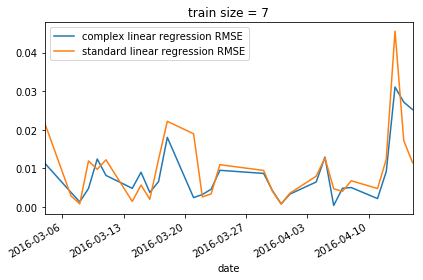

In [24]:
RMSE = pd.DataFrame(columns=('date','complex linear regression RMSE','standard linear regression RMSE'))
n = 7
for i in range(0, 36-n):
    train = allRes[['priceDlC','volumeDlC','sentimentCoefC','complex']].iloc[i:i+n]
    test  = allRes[['priceDlC','volumeDlC','sentimentCoefC','complex']].iloc[i+n:i+n+1]

    b = linregb(train['priceDlC'], train['complex'])
    test['lrPriceDlC'] = test['complex'] * b
    test['lrPriceDlC_real'] = test['lrPriceDlC'].apply(lambda x: x.real)

    lm = LinearRegression()
    lm.fit(train[['volumeDlC', 'sentimentCoefC']], train['priceDlC'])
    test['sklearnLrPriceDlC'] = lm.predict(test[['volumeDlC', 'sentimentCoefC']])

    row = pd.DataFrame({'complex linear regression RMSE': [sqrt(mean_squared_error(test['priceDlC'], test['lrPriceDlC_real']))],
                        'standard linear regression RMSE': [sqrt(mean_squared_error(test['priceDlC'], test['sklearnLrPriceDlC']))],
                        'date': [allRes.index[i+7]]})

    RMSE = RMSE.append(row, ignore_index=True, sort=False)  

    print(RMSE['complex linear regression RMSE'].mean(), RMSE['standard linear regression RMSE'].mean())
    
RMSE.plot(x='date', title = 'train size = 7')
plt.tight_layout()
plt.savefig('plots\sentiments-analysis\complex-and-standard-linear-regression-RMSE.png')
plt.show()

In [25]:
RMSE_all = pd.DataFrame(columns=('train size','complex linear regression RMSE mean','standard linear regression RMSE mean'))

for j in range(5, 16):
    RMSE = pd.DataFrame(columns=('date','complex linear regression RMSE','standard linear regression RMSE'))
    n = j
    for i in range(0, 35-n):
        train = allRes[['priceDlC','volumeDlC','sentimentCoefC','complex']].iloc[i:i+n]
        test  = allRes[['priceDlC','volumeDlC','sentimentCoefC','complex']].iloc[i+n:i+n+1]

        b = linregb(train['priceDlC'], train['complex'])
        test['lrPriceDlC'] = test['complex'] * b
        test['lrPriceDlC_real'] = test['lrPriceDlC'].apply(lambda x: x.real)

        lm = LinearRegression()
        lm.fit(train[['volumeDlC', 'sentimentCoefC']], train['priceDlC'])
        test['sklearnLrPriceDlC'] = lm.predict(test[['volumeDlC', 'sentimentCoefC']])

        row = pd.DataFrame({'complex linear regression RMSE': [(mean_absolute_error(test['priceDlC'], test['lrPriceDlC_real']))],
                            'standard linear regression RMSE': [(mean_absolute_error(test['priceDlC'], test['sklearnLrPriceDlC']))],
                            'date': [allRes.index[i+7]]})

        RMSE = RMSE.append(row, ignore_index=True, sort=False)  

        #print(RMSE['complex linear regression RMSE'].mean(), RMSE['standard linear regression RMSE'].mean())
    
    rowj = pd.DataFrame({'complex linear regression RMSE mean': RMSE['complex linear regression RMSE'].mean(),
                         'standard linear regression RMSE mean': RMSE['standard linear regression RMSE'].mean(),
                         'train size': [j]}) 
    RMSE_all = RMSE_all.append(rowj, ignore_index=True, sort=False)  

RMSE_all.head()

,train size,complex linear regression RMSE mean,standard linear regression RMSE mean
0,5,0.007653,0.010757
1,6,0.007896,0.010340
2,7,0.007869,0.009752
3,8,0.007596,0.009216
4,9,0.007765,0.009062


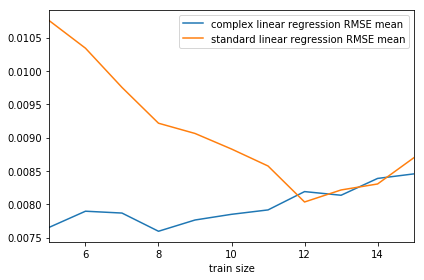

In [26]:
RMSE_all[['train size','complex linear regression RMSE mean',
          'standard linear regression RMSE mean']].plot(x='train size')
plt.tight_layout()
plt.savefig('plots\sentiments-analysis\complex-and-standard-linear-regression-RMSE-mean.png')
plt.show()

In [27]:
startShift = -14
endShift = 14

for i in range(startShift, endShift+1):
    lrdf = pd.DataFrame(columns=('priceDlC','lrPriceDlС','complex','priceDlC_real','lrPriceDlC_real'))
    if (i < 0):
        b = linregb(allRes['priceDlC'].iloc[:i],
                    allRes['complex'].shift(i).iloc[:i])
        lrdf['priceDlC'] = allRes['priceDlC'].iloc[:i]
        lrdf['complex'] = allRes['complex'].shift(i).iloc[:i]
    
    elif (i == 0):
        b = linregb(allRes['priceDlC'],
                    allRes['complex'])
        lrdf[['priceDlC','complex']] = allRes[['priceDlC','complex']]
    
    else:    
        b = linregb(allRes['priceDlC'].iloc[i:],
                    allRes['complex'].shift(i).iloc[i:])
        lrdf['priceDlC'] = allRes['priceDlC'].iloc[i:]
        lrdf['complex'] = allRes['complex'].shift(i).iloc[i:]
    
    print('shift =', i, '  b =', b)

    lrdf = lrdf.copy(deep = True)
    lrdf['lrPriceDlС'] = lrdf['complex'] * b    

    lrdf = lrdf.append(row, ignore_index=True, sort=False)
    
    lrdf['priceDlC_real'] = lrdf['priceDlC'].apply(lambda x: x.real)
    lrdf['lrPriceDlC_real'] = lrdf['lrPriceDlС'].apply(lambda x: x.real)
    #lrdf['priceDL_imag'] = lrdf['priceDl'].apply(lambda x: x.imag)
    #lrdf['lrPriceDl_imag'] = lrdf['lrPriceDl'].apply(lambda x: x.imag)
    #lrdf[['date', 'priceDl_real', 'lrPriceDl_real', 'priceDL_imag', 'lrPriceDl_imag']].plot(x = 'date')
    #lrdf[['priceDlC', 'lrPriceDlC_real']].plot(title = 'shift = ' + str(i))

shift = -14   b = (0.006843793590910635+0.0007845092477623537j)
shift = -13   b = (0.0071488490767185366+0.001017210875579875j)
shift = -12   b = (0.006202778059434249+0.0015340588824416601j)
shift = -11   b = (-0.008594528668422068+0.0005509600907123755j)
shift = -10   b = (0.005242982760592808+0.0018866674657738627j)
shift = -9   b = (0.004166458337535747+0.0014846641343227388j)
shift = -8   b = (-0.006499889580939444-0.0010885332250354842j)
shift = -7   b = (-0.0026182889746437384-0.0005979702036347912j)
shift = -6   b = (-0.01910452494223675-0.0011815091999468922j)
shift = -5   b = (-0.012469331336021273+0.0004296404242563163j)
shift = -4   b = (-0.004700432534841325+0.0009340597527313062j)
shift = -3   b = (-0.013724575449715904-0.00028415352233294414j)
shift = -2   b = (-0.013256195902687295+0.0002787288446912062j)
shift = -1   b = (-0.010943900943309826-0.00039079831887941824j)
shift = 0   b = (-0.011080180784120285-0.0003162978775780782j)
shift = 1   b = (-0.005797153555148518+

## Нормирование результатов

In [28]:
allRes["sentimentCoefNorm"] = ((allRes["sentimentCoef"] - allRes["sentimentCoef"].min()) / 
                        (allRes["sentimentCoef"].max() - allRes["sentimentCoef"].min()))
allRes["priceNorm"]  = ((allRes["price"] - allRes["price"].min()) / 
                        (allRes["price"].max() - allRes["price"].min()))
allRes["volumeNorm"] = ((allRes["volume"] - allRes["volume"].min()) / 
                        (allRes["volume"].max() - allRes["volume"].min()))

In [29]:
#Стандартная функция для нахождения корреляции
print(np.corrcoef(allRes['volumeNorm'], allRes['priceNorm'])[0][1])

print('rc volumeNorm-priceNorm: ' + str(rc(allRes['volumeNorm'],
                                            allRes['priceNorm'])))

-0.1671953407932242
rc volumeNorm-priceNorm: (0.8042252254874648+0j)
